In [65]:
import numpy as np
import torch    
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [66]:
import matplotlib.pyplot as plt

In [67]:
import torch.optim as optim

In [68]:
import numpy as np

In [69]:
import torch  

In [70]:
# train_dir = r'../input/waste-classification-data/DATASET/TRAIN'
# test_dir = r'../input/waste-classification-data/DATASET/TEST'

# classes = ['O', 'R']

In [71]:
train_dir = r'data/DATASET/TRAIN'
test_dir = r'data/DATASET/TEST'

classes = ['O', 'R']

In [72]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

transform = transforms.Compose([transforms.RandomResizedCrop(224),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               normalize])

train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

#now check if they've loaded correctly
print("Number of train images: ", (len(train_data)))
print("Number of test images: ", len(test_data))

Number of train images:  22565
Number of test images:  2513


In [73]:
#prepare data loaders
batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

<ipython-input-74-44a3a55f168c>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, image+1, xticks=[], yticks=[])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floa

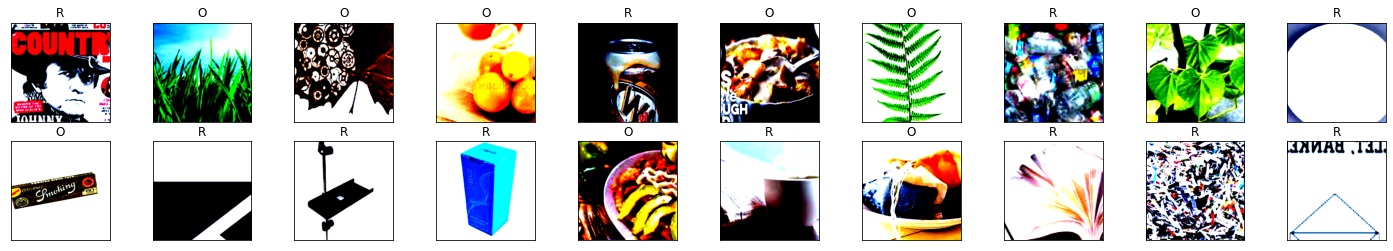

In [74]:
#let's visualize one batch of training data

dataiter = iter(train_loader)
images, labels = dataiter.next()
images.numpy() #convert images to numpy

#plot images with corresponding labels

fig = plt.figure(figsize=(25, 4))
for image in range(batch_size):
    ax = fig.add_subplot(2, 20/2, image+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[image], (1, 2, 0)))
    ax.set_title(classes[labels[image]])

In [75]:
# download pretrained model, vgg16

vgg16 = models.vgg16(pretrained=True)

# check model's architecture
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [76]:
# now we need to freeze the model's parameters, so it acts as a fixed feature extractor and then
# we'll replace last linear layer so that it'll have only 2 out_features -> the number of our classes

for param in vgg16.features.parameters():
    param.requires_grad = False

# access the last layer in the net
n_inputs = vgg16.classifier[6].in_features

# create new layer to have original number of in_features and out_features equal to number of classes we have in our data
last_layer = nn.Linear(n_inputs, len(classes))

# overwrite last layer with our layer
vgg16.classifier[6] = last_layer

# check if it's correct
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [77]:
#final thing before training is to specify loss function, optimzier and learning rate

# specify loss function
# criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss() # binary cross entropy loss
# specify optimizer and learning rate = 0.001
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

In [78]:
# if GPU is available, move the model to GPU
train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
    vgg16.cuda()

In [79]:
#train the network

n_epochs = 1

for epoch in range(1, n_epochs + 1):
    
    #vgg16 by default is in train() mode so we don't have to use this method here
    
    #keep track of training loss
    train_loss = 0
    
    for batch_i, (data, target) in enumerate(train_loader):
        
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
           
        optimizer.zero_grad()             #clear the gradients
        output = vgg16(data)              #do the forward pass
        loss = criterion(output, target)  #calculate loss
        loss.backward()                   #do the backward pass
        optimizer.step()                  #perform parameter update
        train_loss += loss.item()         #update training loss
        
        if batch_i % 20 == 19:    # print training loss every specified number of mini-batches
            print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_i + 1, train_loss / 20))
            train_loss = 0.0

ValueError: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 2])) is deprecated. Please ensure they have the same size.

In [15]:
#test the network

test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

vgg16.eval() # now we need to switch to eval mode

for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    
    output = vgg16(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    
    
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)  
    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())

# calculate test accuracy for each object class
    try:
        for i in range(20):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
    except:
        for i in range(13):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.190799

Test Accuracy of     O: 97% (1370/1408)
Test Accuracy of     R: 87% (977/1118)

Test Accuracy (Overall): 92% (2347/2526)


using ResNet18

In [13]:
from torchvision.models import resnet18

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.resnet = resnet18(pretrained=True)
        self.resnet.fc = nn.Linear(512, 1)    # replace the last full-connected layer of resnet
        self.sigmoid = nn.Sigmoid()           # use a sigmoid layer to map the logit to [0, 1]
    
    def forward(self, x):
        return self.sigmoid(self.resnet(x)).view(-1)

In [14]:
model = Net()
model

/Users/larry_1/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/larry_1/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Net(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [ ]:
# Freeze all layers except the last two layers
for param_name, param in model.named_parameters():
    if 'fc' not in param_name:
        param.requires_grad = False

In [ ]:
model.resnet.conv1.weight[0][0], model.resnet.fc.weight[0][:10]

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [16]:
# define loss function and optimizer
loss_func = nn.BCELoss() # binary cross entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # learning rate is 0.001

In [17]:
loss_train = []
model.train()
n_epochs = 1

for epoch in range(1, n_epochs + 1):
for epoch in range(EPOCH):
    for i, batch in enumerate(train_loader):
        inputs, labels = batch
        outputs = model(inputs)            # forward propagation
        loss = loss_func(outputs.float(), labels.float())  # calculate loss
        loss.backward()                    # back propagation
        optimizer.step()                   # update parameters
        optimizer.zero_grad()              # clear gradients
        if i % 20 == 19:    # print training loss every specified number of mini-batches
            loss_train.append( float(loss) / 20)
            print('Epoch %d, Batch %d loss: %.16f' %
              (epoch, i + 1, float(loss) / 20))
#         train_loss = 0.0
#         print('Epoch %s | %s / %s | loss: %s' % 
#               (epoch, i+1, len(train_loader), float(loss)), end='\r')
#     print()

Epoch 0, Batch 20 loss: 0.0177175059914589
Epoch 0, Batch 40 loss: 0.0101348921656609
Epoch 0, Batch 60 loss: 0.0367489755153656
Epoch 0, Batch 80 loss: 0.0258017122745514
Epoch 0, Batch 100 loss: 0.0312919378280640
Epoch 0, Batch 120 loss: 0.0187385961413383
Epoch 0, Batch 140 loss: 0.0141862988471985
Epoch 0, Batch 160 loss: 0.0250134885311127
Epoch 0, Batch 180 loss: 0.0204594209790230
Epoch 0, Batch 200 loss: 0.0169818997383118
Epoch 0, Batch 220 loss: 0.0193558380007744
Epoch 0, Batch 240 loss: 0.0198645502328873
Epoch 0, Batch 260 loss: 0.0115333124995232
Epoch 0, Batch 280 loss: 0.0166658401489258
Epoch 0, Batch 300 loss: 0.0192831665277481
Epoch 0, Batch 320 loss: 0.0247753977775574
Epoch 0, Batch 340 loss: 0.0294965684413910
Epoch 0, Batch 360 loss: 0.0140608340501785
Epoch 0, Batch 380 loss: 0.0192370250821114
Epoch 0, Batch 400 loss: 0.0226540803909302
Epoch 0, Batch 420 loss: 0.0186172693967819
Epoch 0, Batch 440 loss: 0.0119792923331261
Epoch 0, Batch 460 loss: 0.018177095

KeyboardInterrupt: 

In [35]:
# define the accuracy score
def accuracy_score(pred, y):
    return (pred.astype(int) == y.astype(int)).sum() / pred.shape[0]

In [ ]:
model.eval()
preds = []
trues = []




for i, batch in enumerate(train_loader):
    
    
    
    inputs, labels = batch
    outputs = model(inputs)
    pred = (outputs > 0.5).detach().numpy()   # pred <= 0.5 -> cat;  pred > 0.5 -> dog 
    preds.append(pred)
    trues.append(labels.numpy())
    print('%s / %s' % (i+1, len(train_loader)), end='\r')

preds = np.concatenate(preds, axis=0)
trues = np.concatenate(trues, axis=0)
accuracy_score(preds, trues)

In [ ]:
#test the network

test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

model.eval() # now we need to switch to eval mode

for data, target in enumerate(train_loader):
    loss =  loss_func(outputs.float(), labels.float())  # calculate loss
    test_loss += loss*data.size(0)
    print(test_loss)
    
    # convert output probabilities to predicted class
    _, pred = torch.max(output.detach().numpy(), 1)  
    print(output)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())

# calculate test accuracy for each object class
    try:
        for i in range(20):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
    except:
        for i in range(13):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(train_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

In [ ]:
for i, batcdddh in enumerate(test_dataloader):
    inputs, labels = batch
    outputs = model(inputs)
    pred = (outputs > 0.5).detach().numpy()
    preds.append(pred)
    trues.append(labels.numpy())
    print('Test | %s / %s' % (i+1, len(test_dataloader)), end='\r')

preds = np.concatenate(preds, axis=0)
trues = np.concatenate(trues, axis=0)
accuracy_score(preds, trues)

In [18]:
len(loss_train)

58

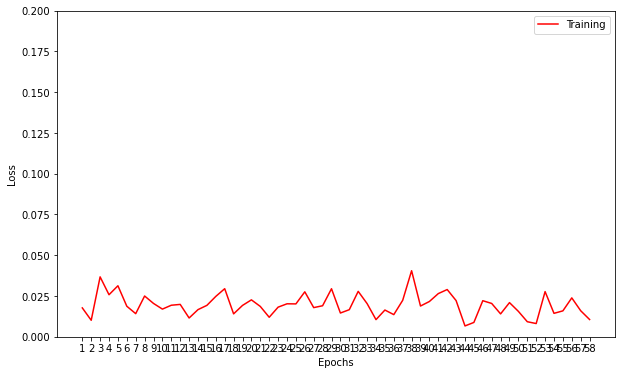

In [20]:
epochs = range(1, len(loss_train)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss_train,c="red",label="Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.ylim((1,57))
plt.ylim((0,0.2))
plt.legend()

In [61]:
# data_path = '/kaggle/input/waste-classification-data/DATASET/TRAIN/'
data_path = r'data/DATASET/TRAIN'
transform = transforms.Compose(
                [
#                     transforms.Resize([256, 256]),
                    transforms.RandomResizedCrop(224),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                ])
train_dataset = torchvision.datasets.ImageFolder(
    root=data_path,
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    num_workers=8,
    shuffle=True
)

print(len(train_loader))

706


In [ ]:
#final thing before training is to specify loss function, optimzier and learning rate

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer and learning rate = 0.001
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

In [62]:
from torchvision.models import vgg16

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.vgg = vgg16(pretrained=True)
        self.vgg.classifier.add_module('6', nn.Linear(4096, 1))  # replace the last fc layer of vgg with a new fc layer
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.vgg(x)
        out = self.sigmoid(out)
        return out.view(-1)

In [63]:
model = Net()
model

Net(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): MaxPoo

In [64]:
# define loss function and optimizer
loss_func = nn.BCELoss() # binary cross entropy loss
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

AttributeError: 'function' object has no attribute 'classifier'

In [25]:
EPOCH = 2

model.train()
for epoch in range(EPOCH):
    for i, batch in enumerate(train_loader):
        inputs, labels = batch
        outputs = model(inputs)            # forward propagation
        outputs=outputs.to(torch.float32)
        labels=labels.to(torch.float32)
        loss = loss_func(outputs, labels)  # calculate loss
        loss.backward()                    # back propagation
        optimizer.step()                   # update parameters
        optimizer.zero_grad()              # clear gradients
        print('Epoch %s | %s / %s | loss: %s' % 
              (epoch, i+1, len(train_loader), float(loss)), end='\r')
    print()

Epoch 0 | 1129 / 1129 | loss: 0.6888738870620728
Epoch 1 | 1129 / 1129 | loss: 0.6706640124320984


In [26]:
# define the accuracy score
def accuracy_score(pred, y):
    return (pred.astype(int) == y.astype(int)).sum() / pred.shape[0]

In [27]:
model.eval()
preds = []
trues = []
for i, batcdddh in enumerate(train_loader):
    inputs, labels = batch
    outputs = model(inputs)
    pred = (outputs > 0.5).detach().numpy()
    preds.append(pred)
    trues.append(labels.numpy())
    print('Test | %s / %s' % (i+1, len(train_loader)), end='\r')

preds = np.concatenate(preds, axis=0)
trues = np.concatenate(trues, axis=0)
accuracy_score(preds, trues)

0.6

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.vgg = vgg16(pretrained=True)
        self.resnet.fc = nn.Linear(512, 128)    # replace the last full-connected layer of resnet
        self.relu = nn.ReLU()
        self.fc = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()           # use a sigmoid layer to map the logit to [0, 1]

In [33]:
model = Net()
model

AttributeError: 'Net' object has no attribute 'resnet'

In [3]:
EPOCH = 2

model.train()
for epoch in range(EPOCH):
    for i, batch in enumerate(train_loader):
        inputs, labels = batch
        outputs = model(inputs)            # forward propagation
        outputs=outputs.to(torch.float32)
        labels=labels.to(torch.float32)
        loss = loss_func(outputs, labels)  # calculate loss
        loss.backward()                    # back propagation
        optimizer.step()                   # update parameters
        optimizer.zero_grad()              # clear gradients
        print('Epoch %s | %s / %s | loss: %s' % 
              (epoch, i+1, len(train_loader), float(loss)), end='\r')
    print()

NameError: name 'model' is not defined

In [ ]:
model.eval()
preds = []
trues = []
for i, batcdddh in enumerate(train_loader):
    inputs, labels = batch
    outputs = model(inputs)
    pred = (outputs > 0.5).detach().numpy()
    preds.append(pred)
    trues.append(labels.numpy())
    print('Test | %s / %s' % (i+1, len(train_loader)), end='\r')

preds = np.concatenate(preds, axis=0)
trues = np.concatenate(trues, axis=0)
accuracy_score(preds, trues)